In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression


In [11]:
#Loading the Data
import pandas as pd 
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.Series(housing.target, name="MedHouseVal")

## 2. Exploratory Data Analysis for Assumptions

### 2.1 Linearity

We check for linearity by plotting each predictor against the target variable. A linear trend in these scatter plots supports the linearity assumption. These do not seem to be linear. The assumptions of linearity do not hold. 

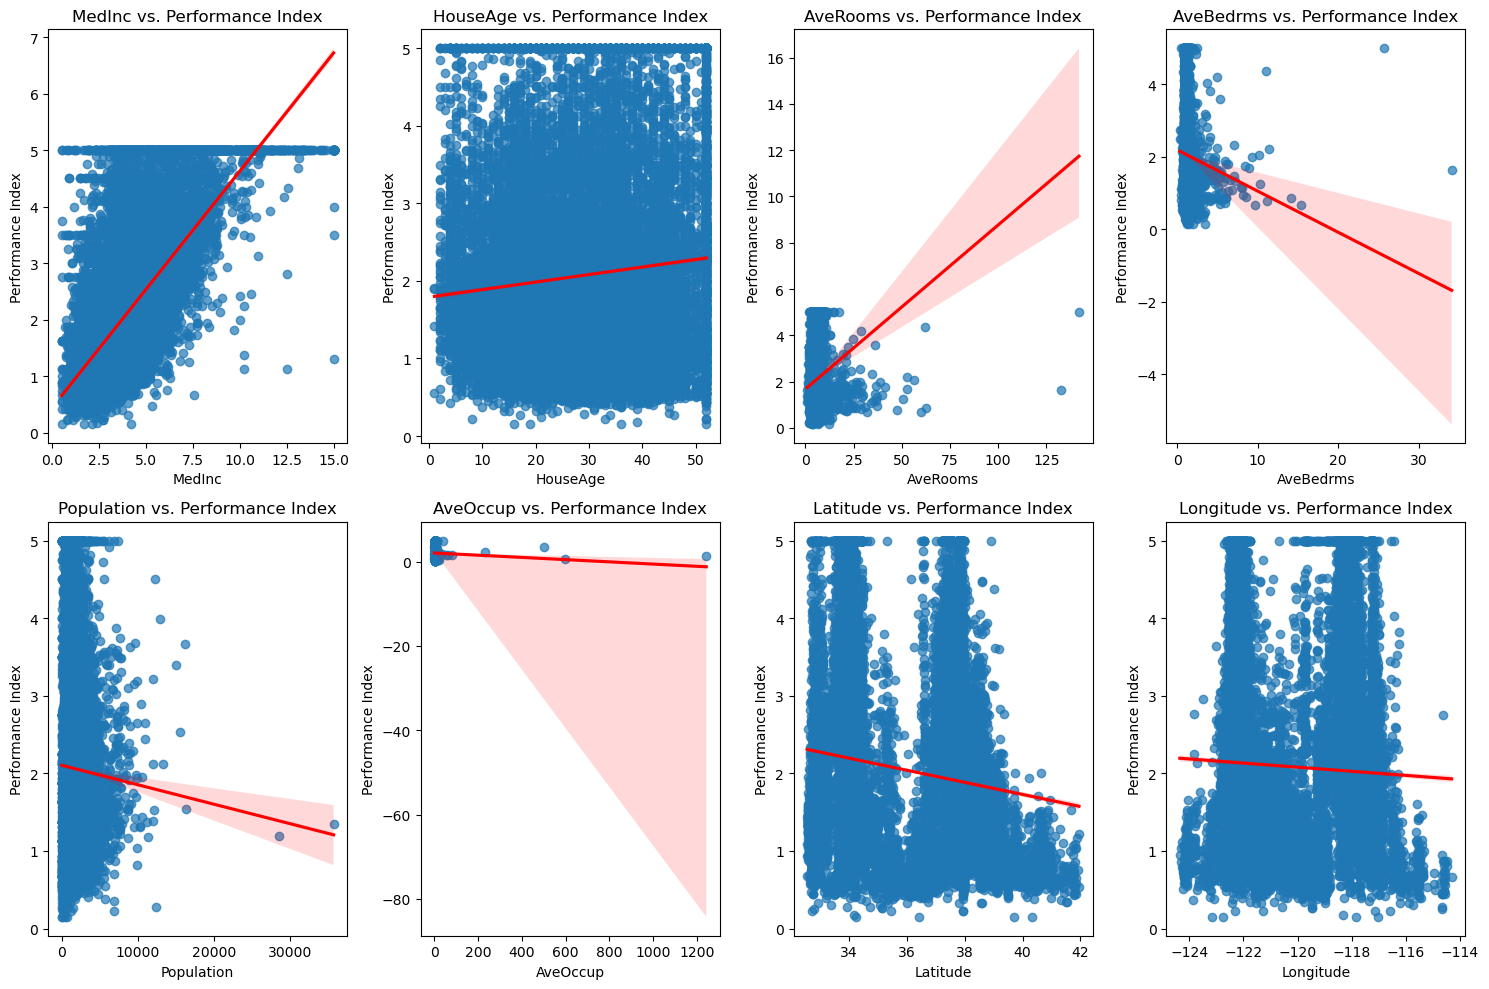

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i, col in enumerate(housing.feature_names):
    plt.subplot(2, 4, i + 1)
    sns.regplot(x=X[col],
                y=y,
                scatter_kws={'alpha': 0.7},
                line_kws={'color': 'red'})
    plt.title(f"{col} vs. Performance Index")
    plt.xlabel(col)
    plt.ylabel("Performance Index")
plt.tight_layout()
plt.show()

### 2.2 Multicollinearity

We assess multicollinearity by computing the Variance Inflation Factor (VIF) for each predictor. VIF values below 5 (or sometimes 10) generally indicate that multicollinearity is not a concern. We have a couple over 5, here. 

In [12]:
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print(vif_data)

      feature           VIF
0       const  17082.623698
1      MedInc      2.501295
2    HouseAge      1.241254
3    AveRooms      8.342786
4   AveBedrms      6.994995
5  Population      1.138125
6    AveOccup      1.008324
7    Latitude      9.297624
8   Longitude      8.962263


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
residuals = y - y_pred

## 4. Model Diagnostic Plots

### 4.1 Homoscedasticity

To assess homoscedasticity (constant variance of residuals), we plot the residuals versus the predicted values. A random scatter around zero suggests constant variance. Does not seem random, here. 

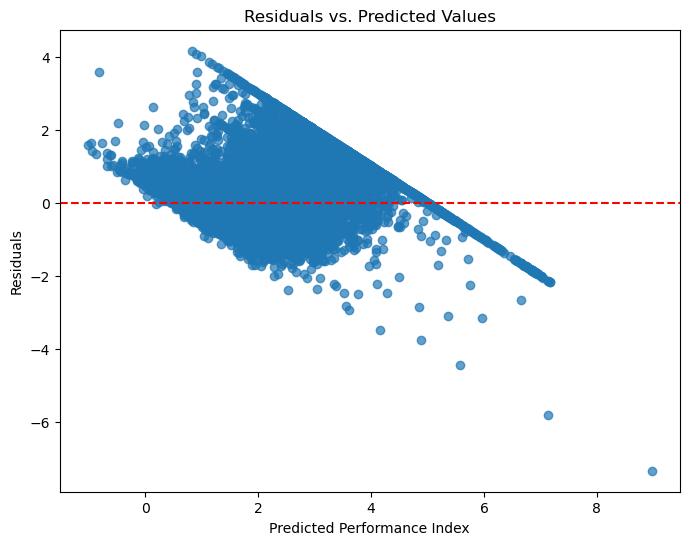

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Performance Index")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

### 4.2 Normality of Residuals

We check the normality assumption by looking at:

- **Histogram of Residuals:** Should resemble a bell-shaped curve. (It does not
)

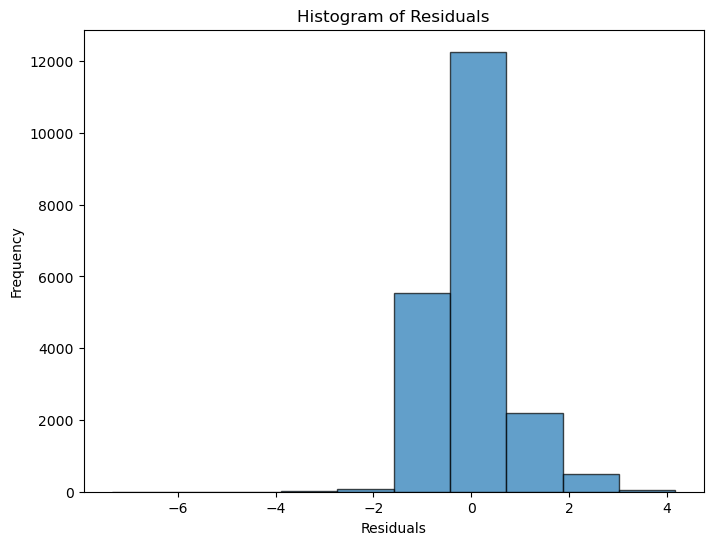

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

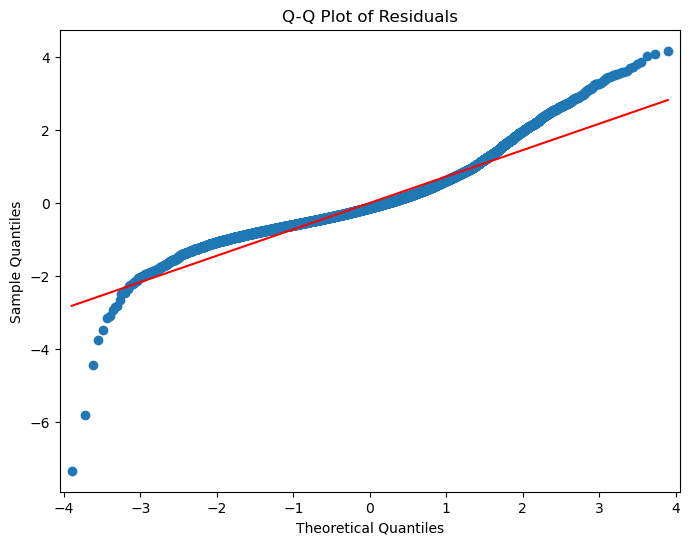

In [20]:
# Q-Q Plot of Residuals
plt.figure(figsize=(8, 6))
qqplot(residuals, line='s', ax=plt.gca())
plt.title("Q-Q Plot of Residuals")
plt.show()